In [86]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np

In [87]:
(x_train, _), (x_test, _) = mnist.load_data()

- x_train, x_test는int8이여서 float32로 변경 필요
- 변경하는 김에 0~1사이로 정규화
- shape 또한 (Batch, W, H)로 (Batch, W, H, Channel)로 Reshape

In [88]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [89]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

### Encoder
- (28, 28, 1)
- Conv2D 1 : (28, 28, 16)
- MaxP2D 1 : (14, 14, 16)
- Conv2D 2 : (14, 14, 8)
- MaxP2D 2 : (7, 7, 8)
- Conv2D 3 : (7, 7, 8)
- MaxP2D 3 : (4, 4, 8)

In [90]:
input_img = Input(shape=(28,28,1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x_ = Conv2D(1, (1, 1), padding='same')(encoded)

In [91]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [92]:
autoencoder = Model(input_img, decoded)
feature = Model(input_img, x_)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
feature.compile(optimizer='adadelta', loss='binary_crossentropy')

In [93]:
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 8)           0  

In [94]:
feature.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 8)           0  

In [114]:
autoencoder.fit(x_train, x_train,
               epochs=30,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.1142 - val_loss: 0.1120
Epoch 2/30
60000/60000 [==============================] - 4s 66us/step - loss: 0.1130 - val_loss: 0.1101
Epoch 3/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.1120 - val_loss: 0.1170
Epoch 4/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.1109 - val_loss: 0.1087
Epoch 5/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.1103 - val_loss: 0.1084
Epoch 6/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.1094 - val_loss: 0.1065
Epoch 7/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.1087 - val_loss: 0.1074
Epoch 8/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.1081 - val_loss: 0.1069
Epoch 9/30
60000/60000 [==============================] - 4s 69us/step - loss: 0.1074 - val_loss: 0.1063
Epoch

In [115]:
decoded_imgs = autoencoder.predict(x_test)
feature_imgs = feature.predict(x_test)

In [116]:
decoded_imgs[0].shape

(28, 28, 1)

In [117]:
feature_imgs[0].shape

(4, 4, 1)

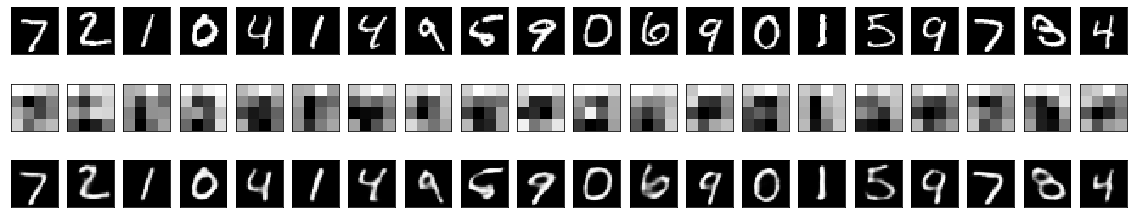

In [118]:
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoder feature
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(feature_imgs[i].reshape(4, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Epoch = 10
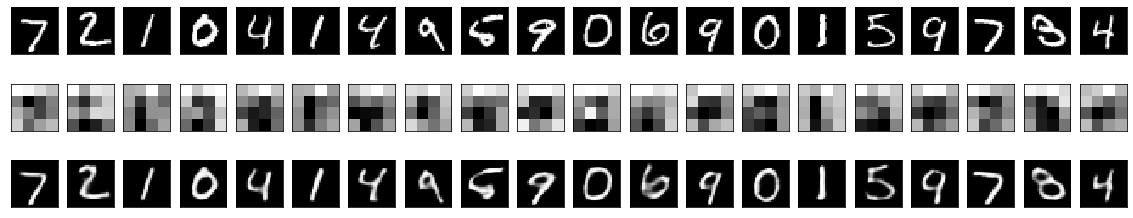

### Epoch = 30
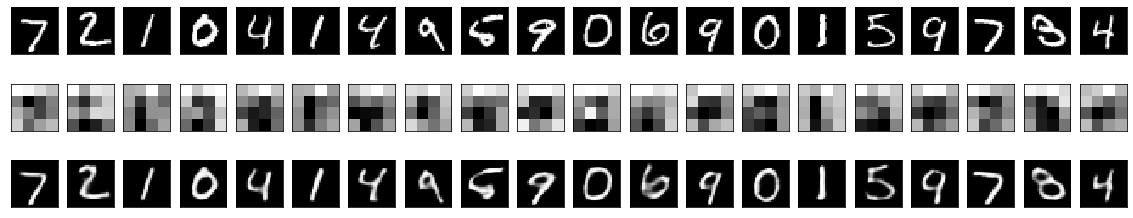